In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [14]:
data = pd.read_csv(r'C:\Users\ssree\OneDrive\Desktop\Project\SmartBridge\New folder\garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns


In [16]:
numerical_data = data.select_dtypes(exclude=['object'])
corrMatrix = numerical_data.corr()

In [17]:
corrMatrix_categorical = data[categorical_columns].apply(lambda x: x.factorize()[0]).corr()

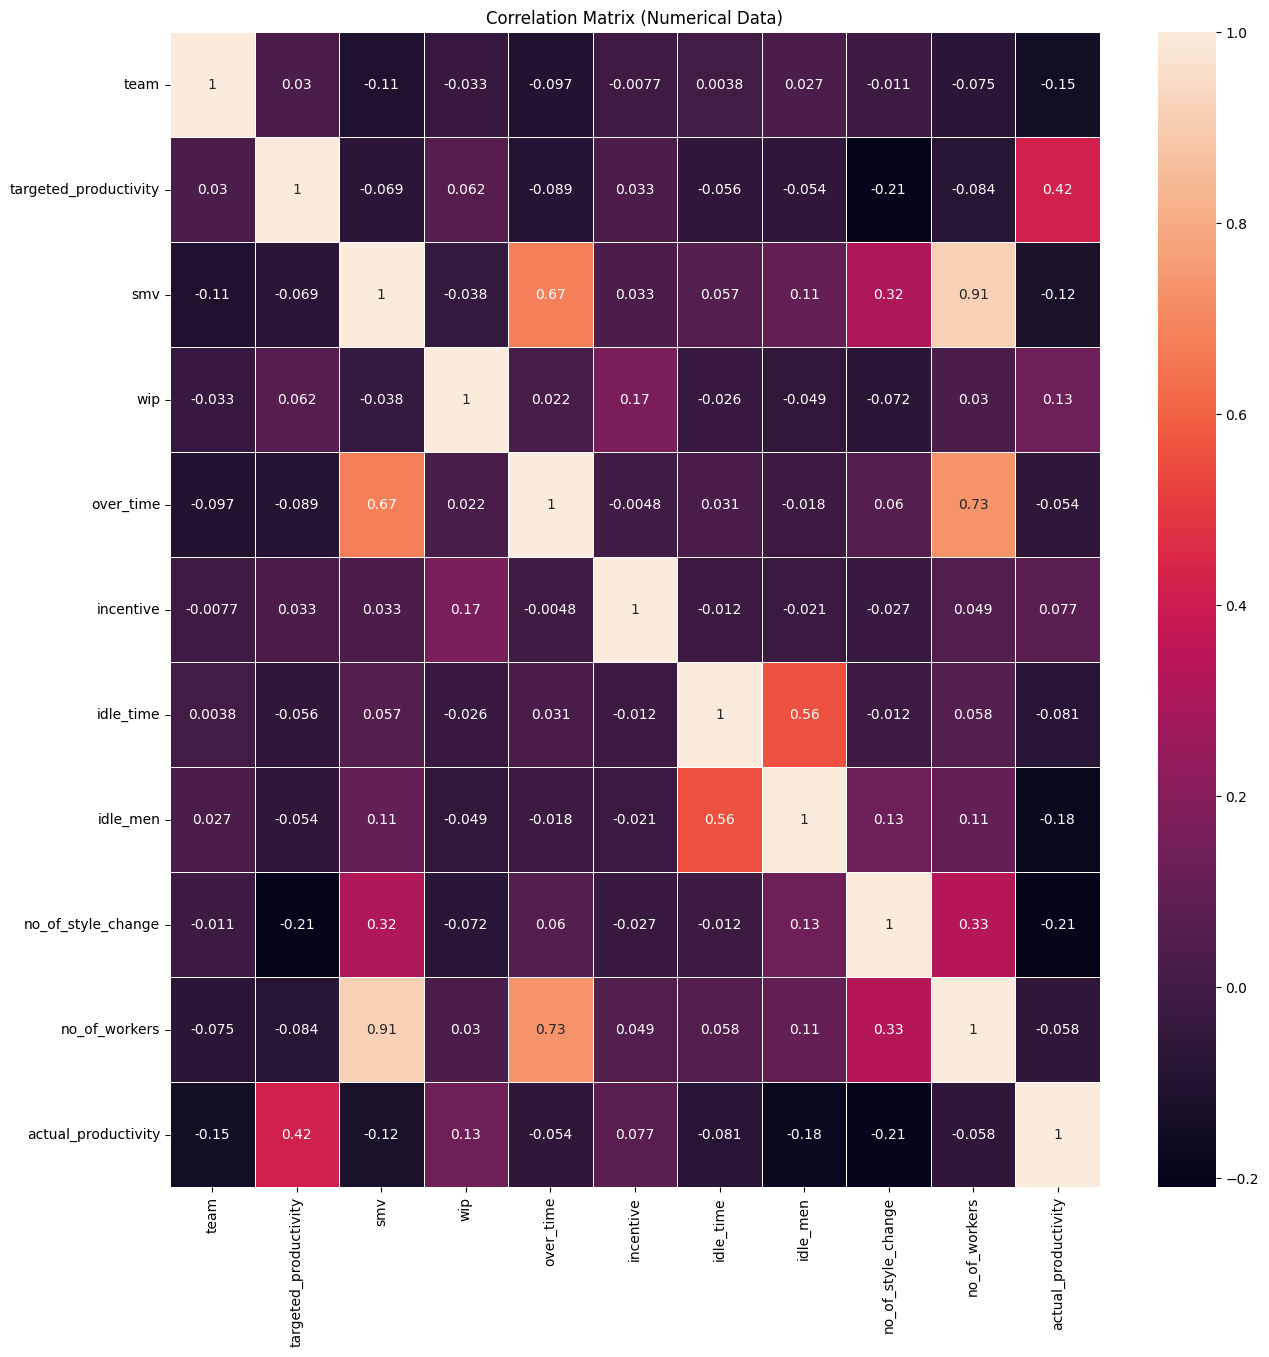

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.title("Correlation Matrix (Numerical Data)")
plt.show()

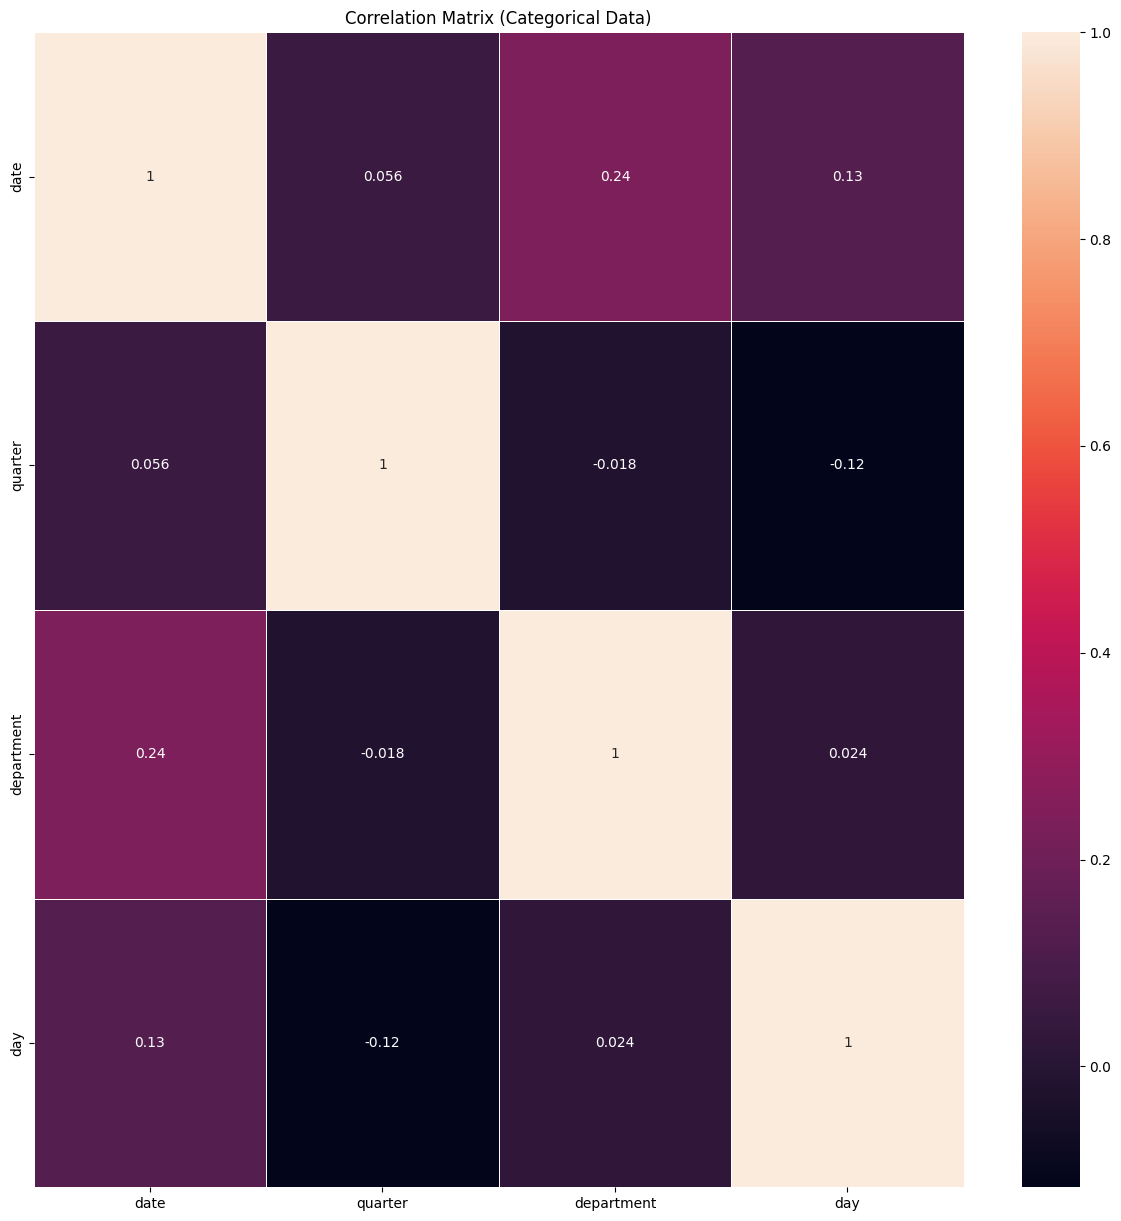

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix_categorical, annot=True, linewidths=.5, ax=ax)
plt.title("Correlation Matrix (Categorical Data)")
plt.show()

In [20]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [21]:
data.shape

(1197, 15)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [23]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [24]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data.index != 'wip']
print(missing_data)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [25]:
data['date'] = pd.to_datetime(data['date'])

In [26]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [27]:
# Count the values in the 'department' column
department_counts = data['department'].value_counts()

# Display the value counts
print(department_counts)

# Merge 'finishing' and 'finishing ' into 'finishing'
data['department'] = data['department'].apply(lambda x: 'finishing' if x.strip() == 'finishing' else x)

# Verify the changes by counting the values again
new_department_counts = data['department'].value_counts()
print(new_department_counts)


department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64
department
sweing       691
finishing    506
Name: count, dtype: int64


In [28]:
print(data.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [30]:
df=pd.read_csv(r'C:\Users\ssree\OneDrive\Desktop\Project\SmartBridge\New folder\garments_worker_productivity.csv')
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


1.   date : Date in MM-DD-YYYY
4.   day : Day of the Week
2.   quarter : A portion of the month. A month was divided into four quarters
3.   department : Associated department with the instance
4.   day : Day of the Week
5.   team : Associated team number with the instance 
6.   targeted productivity : Targeted productivity set by the Authority for each team for each day. 
7.   smv : Standard Minute Value, it is the allocated time for a task 
8.   wip : Work in progress. Includes the number of unfinished items for products 
9.   overtime : Represents the amount of overtime by each team in minutes
10.  incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
11.  idletime : The amount of time when the production was interrupted due to several reasons 
12.  idlemen : The number of workers who were idle due to production interruption
13.  no of style change : Number of changes in the style of a particular product
14.  no of workers : Number of workers in each team 
15.  actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [58]:
df.info()


median_wip = df['wip'].median()
print("Median for 'wip' column after handling missing values:")
print(median_wip)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [32]:
# number of columns
data.shape

(1197, 15)

In [33]:
data.head

<bound method NDFrame.head of            date   quarter department        day  team  targeted_productivity  \
0    2015-01-01  Quarter1     sweing   Thursday     8                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2    2015-01-01  Quarter1     sweing   Thursday    11                   0.80   
3    2015-01-01  Quarter1     sweing   Thursday    12                   0.80   
4    2015-01-01  Quarter1     sweing   Thursday     6                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1192 2015-03-11  Quarter2  finishing  Wednesday    10                   0.75   
1193 2015-03-11  Quarter2  finishing  Wednesday     8                   0.70   
1194 2015-03-11  Quarter2  finishing  Wednesday     7                   0.65   
1195 2015-03-11  Quarter2  finishing  Wednesday     9                   0.75   
1196 2015-03-11  Quarter2  finishing  Wednesday     6                   0.70   

        s

In [34]:
data.columns = data.columns.str.strip()
print(data.columns)


Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [35]:
data['team_encoded'] = data['team'].astype('category').cat.codes


In [36]:
data = pd.get_dummies(data, columns=['quarter', 'department', 'day'], drop_first=True)


In [37]:
x=data.drop(['actual_productivity'],axis=1)
y=data['actual_productivity']
X=x.to_numpy()
X
             
            

In [42]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

In [41]:
# Drop rows with missing values
data = data.dropna()

# Then, proceed with the rest of the code as before


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
data = pd.read_csv(r'C:\Users\ssree\OneDrive\Desktop\Project\SmartBridge\New folder\garments_worker_productivity.csv')

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract day, month, and year from the 'date' column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Perform one-hot encoding for categorical features
data = pd.get_dummies(data, columns=['quarter', 'department'], drop_first=True)

# Define your features (X) and target variable (y)
X = data.drop(['actual_productivity', 'date'], axis=1)
y = data['actual_productivity']

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.01499010043914788
Mean Absolute Error: 0.0739214755302304
R-squared: 0.4354535603759042


This is the final model that we integrate to the flask.py to get the right output

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv(r'C:\Users\ssree\OneDrive\Desktop\Project\SmartBridge\New folder\garments_worker_productivity.csv')

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract day, month, and year from the 'date' column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Perform one-hot encoding for categorical features
data = pd.get_dummies(data, columns=['quarter', 'department'], drop_first=True)

# Define your features (X) and target variable (y)
X = data.drop(['actual_productivity', 'date'], axis=1)
y = data['actual_productivity']

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both the training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data with imputed values
model.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_imputed)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Threshold for considering R-squared as high
threshold = 0.5

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Check if R-squared is above the threshold
if r2 > threshold:
    print("Employee is highly productive ")
else:
    print("Employee is low productive")


Mean Squared Error: 0.02122406712429829
Mean Absolute Error: 0.10725581350934572
R-squared: 0.20067436652568948
Employee is low productive


In [57]:
import pickle

# Assuming `xgboost_model` is the variable containing your trained XGBoost model
# You should replace this with the actual variable name you used
# Also, replace 'xgboost_model.pkl' with the desired file name

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [50]:
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32

In [51]:
# we want to use flter with some attributes 
df[(df['department']=='sweing')&(df['targeted_productivity']>0.60)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [52]:
# we used the filter with the incentive(epresents the amount of financial incentive ) more than 90, number of workers more than 50 and also actual productivity more than 50%
df[(df['incentive']>90)&(df['actual_productivity']>0.50)&(df['no_of_workers']>50)].head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
354,1/21/2015,Quarter3,sweing,Wednesday,4,0.75,22.52,825.0,10080,94,0.0,0,0,56.0,0.900556
396,1/24/2015,Quarter4,sweing,Saturday,2,0.75,22.94,1606.0,10260,94,0.0,0,0,57.0,0.900648
397,1/24/2015,Quarter4,sweing,Saturday,4,0.75,22.52,727.0,10260,94,0.0,0,0,57.0,0.900321
422,1/25/2015,Quarter4,sweing,Sunday,4,0.75,22.52,867.0,10260,94,0.0,0,0,57.0,0.900321


In [53]:
# as you see, we categorized the department with the productivity that shows the when the target is near the one , the abundance of department will be more.
df['department'].unique()
department_targeted_productivity=pd.crosstab(df['department'],df['targeted_productivity'])
department_targeted_productivity

targeted_productivity,0.07,0.35,0.40,0.50,0.60,0.65,0.70,0.75,0.80
department,,,,,,,,,
finishing,0,5,1,11,9,6,62,45,110
finishing,0,5,0,6,10,19,32,50,135
sweing,1,17,1,32,38,38,148,121,295


In [106]:

df['quarter'].unique()
quarter_idle_men=pd.crosstab(df['quarter'],df['idle_men'])
quarter_idle_men

idle_men,0,10,15,20,25,30,35,37,40,45
quarter,,,,,,,,,,
Quarter1,352,1,2,1,0,1,0,1,1,1
Quarter2,335,0,0,0,0,0,0,0,0,0
Quarter3,202,2,1,1,0,2,2,0,0,0
Quarter4,246,0,0,1,1,0,0,0,0,0
Quarter5,44,0,0,0,0,0,0,0,0,0


In [107]:
#wip : Work in progress. Includes the number of unfinished items for products
df['day'].unique()
day_wip=pd.crosstab(df['day'],df['wip'])
day_wip

wip,7.0,10.0,11.0,12.0,13.0,14.0,15.0,29.0,30.0,52.0,...,2698.0,2984.0,8992.0,9792.0,12261.0,16882.0,21266.0,21385.0,21540.0,23122.0
day,,,,,,,,,,,,,,,,,,,,,
Monday,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Saturday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sunday,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thursday,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tuesday,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Wednesday,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df_grouped_sum=df.groupby('quarter',as_index=False)['actual_productivity'].agg('sum').rename(columns={'actual_productivity':'actual_productivity_Sum'})
df_grouped_cnt=df.groupby('quarter',as_index=False)['actual_productivity'].agg('count').rename(columns={'actual_productivity':'actual_productivity_Count'})

# Merge the codes 
df_grouped_amount=df_grouped_sum.merge(df_grouped_cnt, left_on='quarter',right_on='quarter',how='inner')

#calculate the amount average of amount 
df_grouped_amount.loc[:,'Average of Amount']=df_grouped_amount['actual_productivity_Sum']/df_grouped_amount['actual_productivity_Count']


df_grouped_amount.sort_values('actual_productivity_Sum',ascending=False)
# As you see, the quater 1 has the hoighest portion among others and quarter 5 has the lowest portion 

,quarter,actual_productivity_Sum,actual_productivity_Count,Average of Amount
0,Quarter1,270.561521,360,0.751560
1,Quarter2,249.142761,335,0.743710
3,Quarter4,175.848647,248,0.709067
2,Quarter3,147.999310,210,0.704759
4,Quarter5,36.351805,44,0.826177


In [109]:
df_grouped_sum=df.groupby('day',as_index=False)['actual_productivity'].agg('sum').rename(columns={'actual_productivity':'actual_productivity_Sum'})
df_grouped_cnt=df.groupby('day',as_index=False)['actual_productivity'].agg('count').rename(columns={'actual_productivity':'actual_productivity_Count'})
#merge the 2 lines 
df_grouped_amount=df_grouped_sum.merge(df_grouped_cnt,left_on='day',right_on='day',how='inner')
#calculate the amount of the average 
df_grouped_amount.loc[:,'Average of Amount']=df_grouped_amount['actual_productivity_Sum']/df_grouped_amount['actual_productivity_Count']

df_grouped_amount.sort_values('actual_productivity_Sum',ascending=False)

,day,actual_productivity_Sum,actual_productivity_Count,Average of Amount
5,Wednesday,151.936077,208,0.730462
4,Tuesday,149.282884,201,0.742701
2,Sunday,147.906638,203,0.728604
0,Monday,146.362211,199,0.735488
3,Thursday,143.805535,199,0.722641
1,Saturday,140.610697,187,0.751929


# we want to visualize with some plots with seaborn and matplotlib

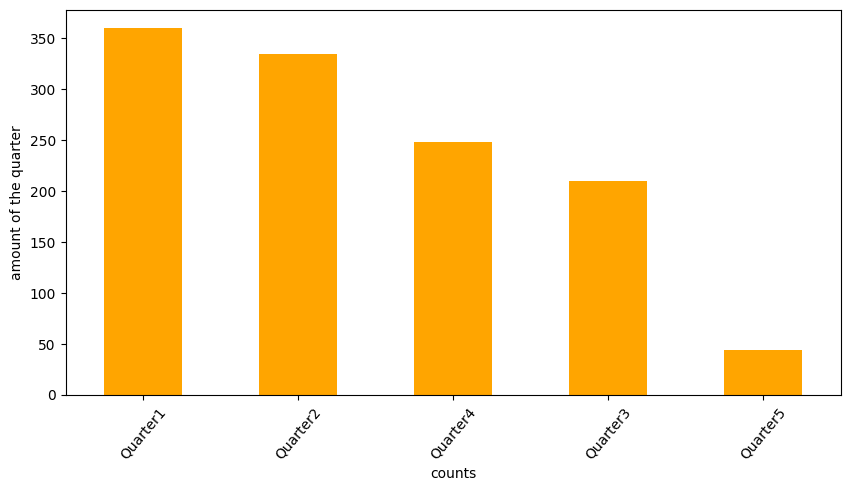

In [110]:
plt.rcParams['figure.figsize']=(10,5)
df['quarter'].value_counts().sort_values(ascending=False).plot.bar(color='orange')
plt.xlabel('counts')
plt.ylabel('amount of the quarter')
plt.xticks(rotation=50)
plt.show()

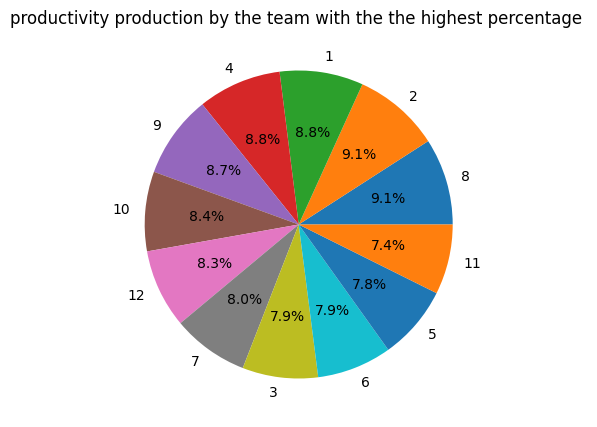

In [111]:
plt.rcParams['figure.figsize']=(10,5)
df['team'].value_counts().sort_values(ascending=False).plot.pie(y='team',autopct="%0.1f%%")
plt.title('productivity production by the team with the the highest percentage ')
plt.axis('off')
plt.show()
#As you see, the highest percent for the teams 9

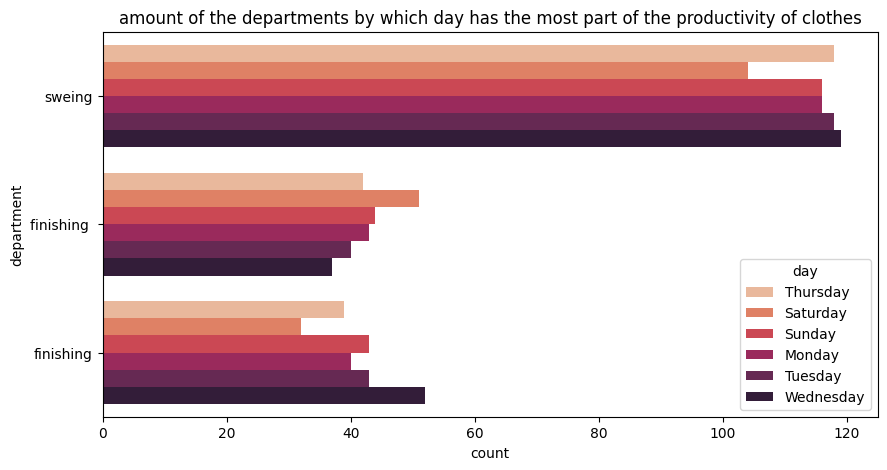

<Figure size 1000x500 with 0 Axes>

In [112]:
sns.countplot(data=df, y='department',hue='day',palette='rocket_r')
plt.title('amount of the departments by which day has the most part of the productivity of clothes')
plt.figure(figsize=(10,5))
plt.show()
#as you see, the sweing part has the highest part and wednesday is the busiest day

<Axes: xlabel='quarter', ylabel='actual_productivity'>

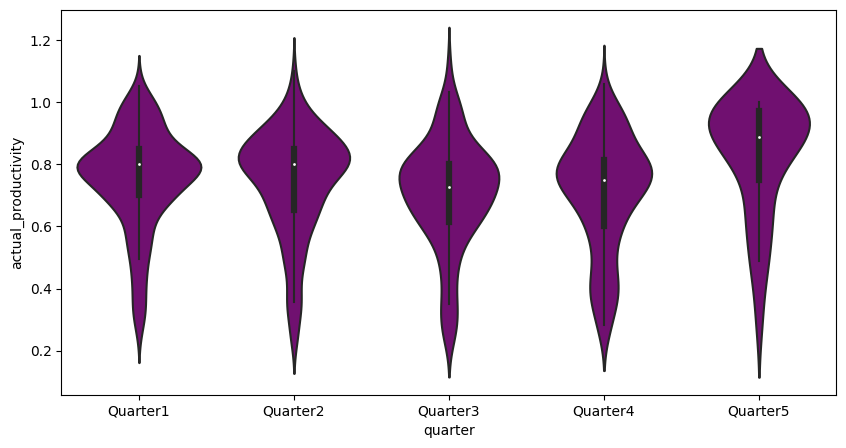

In [113]:
sns.violinplot(x='quarter',y='actual_productivity',data=df, color='purple')
#the quarter 3 has the highest actual_productivity among othrs

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



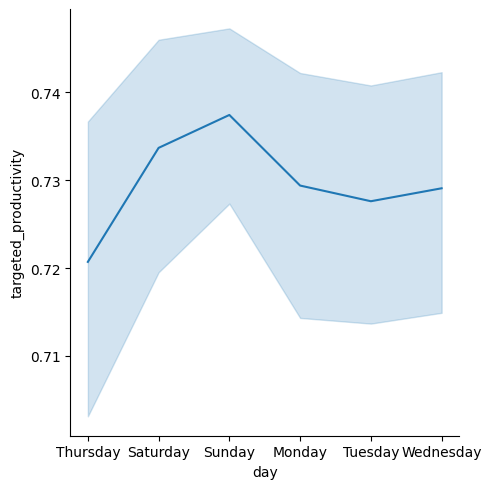

In [114]:
sns.relplot(x='day',y='targeted_productivity',data=df, kind='line')

/tmp/ipykernel_32/1682513550.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='incentive', ylabel='Density'>

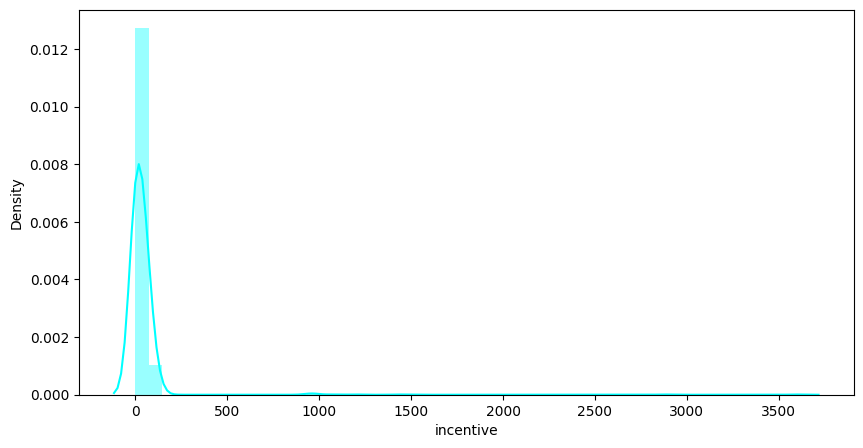

In [115]:
sns.distplot(df['incentive'],color='aqua')

# Result
* in this program, we use pandas and many libraries to finish the model training to find out employee performance prediction 
* we also use some filter with some attributes to find out better result.
* with seaborn,we visualize with countplot, violinplot, jointplot, distplot, relplot and scatterplot and each of them shows better underestanding of the data.